In [ ]:
!pip install tensorflow
!pip install scikit-learn
!pip install opencv-python
!pip install split-folders

In [ ]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [ ]:
!kaggle datasets download samaneheslamifar/facial-emotion-expressions

Dataset URL: https://www.kaggle.com/datasets/samaneheslamifar/facial-emotion-expressions
License(s): unknown
 79% 95.0M/121M [00:00<00:00, 991MB/s]
100% 121M/121M [00:00<00:00, 893MB/s] 


In [ ]:
from zipfile import ZipFile
dataset = '/content/facial-emotion-expressions.zip'
with ZipFile(dataset, 'r') as zip:
  zip.extractall()
  print('The dataset is extracted')

The dataset is extracted


In [ ]:
import tensorflow as tf
from sklearn.metrics import classification_report
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import cv2
import os
import splitfolders
import random
%matplotlib inline

In [ ]:
path = '/content/images/'
os.listdir(path)

['train', 'images', 'validation']

In [ ]:
directory = "data"
os.mkdir(directory)

In [ ]:
angry = '/content/data/angry'
disgust = '/content/data/disgust'
fear = '/content/data/fear'
happy = '/content/data/happy'
neutral = '/content/data/neutral'
sad = '/content/data/sad'
surprise = '/content/data/surprise'
emotions = ['angry', 'disgust', 'fear', 'happy', 'neutral', 'sad', 'surprise']

In [ ]:
os.chdir('/content/data/')
for i in emotions:
  os.mkdir(i)

In [ ]:
z=0

In [ ]:
for i in os.listdir("/content/images/images/train"):
    for j in os.listdir("/content/images/images/train/"+i):
        im=cv2.imread("/content/images/images/train/"+i+"/"+j)
        cv2.imwrite("/content/data/"+i+"/"+str(z).zfill(5)+".jpg",im)
        z+=1

In [ ]:
for i in os.listdir("/content/images/images/validation/"):
    for j in os.listdir("/content/images/images/validation/"+i):
        im=cv2.imread("/content/images/images/validation/"+i+"/"+j)
        cv2.imwrite("/content/data/"+i+"/"+str(z).zfill(5)+".jpg",im)
        z+=1

In [ ]:
for i in os.listdir("/content/images/train"):
    for j in os.listdir("/content/images/train/"+i):
        im=cv2.imread("/content/images/train/"+i+"/"+j)
        cv2.imwrite("/content/data/"+i+"/"+str(z).zfill(5)+".jpg",im)
        z+=1

In [ ]:
for i in os.listdir("/content/images/validation"):
    for j in os.listdir("/content/images/validation/"+i):
        im=cv2.imread("/content/images/validation/"+i+"/"+j)
        cv2.imwrite("/content/data/"+i+"/"+str(z).zfill(5)+".jpg",im)
        z+=1

In [ ]:
for i in os.listdir("/content/data"):
    print("=>"+i+" folder contains: "+str(len(os.listdir("/content/data/"+i)))+" images")

=>disgust folder contains: 1094 images
=>happy folder contains: 17978 images
=>sad folder contains: 12154 images
=>fear folder contains: 10242 images
=>neutral folder contains: 12396 images
=>angry folder contains: 9906 images
=>surprise folder contains: 8004 images


In [ ]:
os.chdir('/content/')
splitfolders.ratio('/content/data', output="newData", seed=1337, ratio=(0.7, 0.2,0.1))

Copying files: 71774 files [00:08, 8478.80 files/s] 


In [ ]:
datasetPath="/content/newData/"

In [ ]:
for i in os.listdir(datasetPath):
    print("==> "+i+" folder contains:")
    for j in os.listdir(datasetPath+i):
        print("\t => "+j+" folder contains: "+str(len(os.listdir(datasetPath+i+"/"+j)))+" images.")

==> val folder contains:
	 => disgust folder contains: 218 images.
	 => happy folder contains: 3595 images.
	 => sad folder contains: 2430 images.
	 => fear folder contains: 2048 images.
	 => neutral folder contains: 2479 images.
	 => angry folder contains: 1981 images.
	 => surprise folder contains: 1600 images.
==> train folder contains:
	 => disgust folder contains: 765 images.
	 => happy folder contains: 12584 images.
	 => sad folder contains: 8507 images.
	 => fear folder contains: 7169 images.
	 => neutral folder contains: 8677 images.
	 => angry folder contains: 6934 images.
	 => surprise folder contains: 5602 images.
==> test folder contains:
	 => disgust folder contains: 111 images.
	 => happy folder contains: 1799 images.
	 => sad folder contains: 1217 images.
	 => fear folder contains: 1025 images.
	 => neutral folder contains: 1240 images.
	 => angry folder contains: 991 images.
	 => surprise folder contains: 802 images.


In [ ]:
imgSize = (64,64)

In [ ]:
X_train=[]
X_test=[]
X_val=[]
y_train=[]
y_test=[]
y_val=[]

In [ ]:
for i in os.listdir(datasetPath+"train"):
    for j in os.listdir(datasetPath+"train/"+i):
        im=cv2.imread(datasetPath+"train/"+i+"/"+j)
        image=cv2.resize(im,imgSize)
        img = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
        X_train.append(img)
        y_train.append(i)

In [ ]:
for i in os.listdir(datasetPath+"test"):
    for j in os.listdir(datasetPath+"test/"+i):
        im=cv2.imread(datasetPath+"test/"+i+"/"+j)
        image=cv2.resize(im,imgSize)
        img = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
        X_test.append(img)
        y_test.append(i)

In [ ]:
for i in os.listdir(datasetPath+"val"):
    for j in os.listdir(datasetPath+"val/"+i):
        im=cv2.imread(datasetPath+"val/"+i+"/"+j)
        image=cv2.resize(im,imgSize)
        img = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
        X_val.append(img)
        y_val.append(i)

In [ ]:
print(len(X_train),len(y_train))
print(len(X_test),len(y_test))
print(len(X_val),len(y_val))

50238 50238
7185 7185
14351 14351


In [ ]:
from sklearn.utils import shuffle
X_train, y_train = shuffle(X_train, y_train, random_state=42)
X_test, y_test = shuffle(X_test, y_test, random_state=42)
X_val, y_val = shuffle(X_val, y_val, random_state=42)

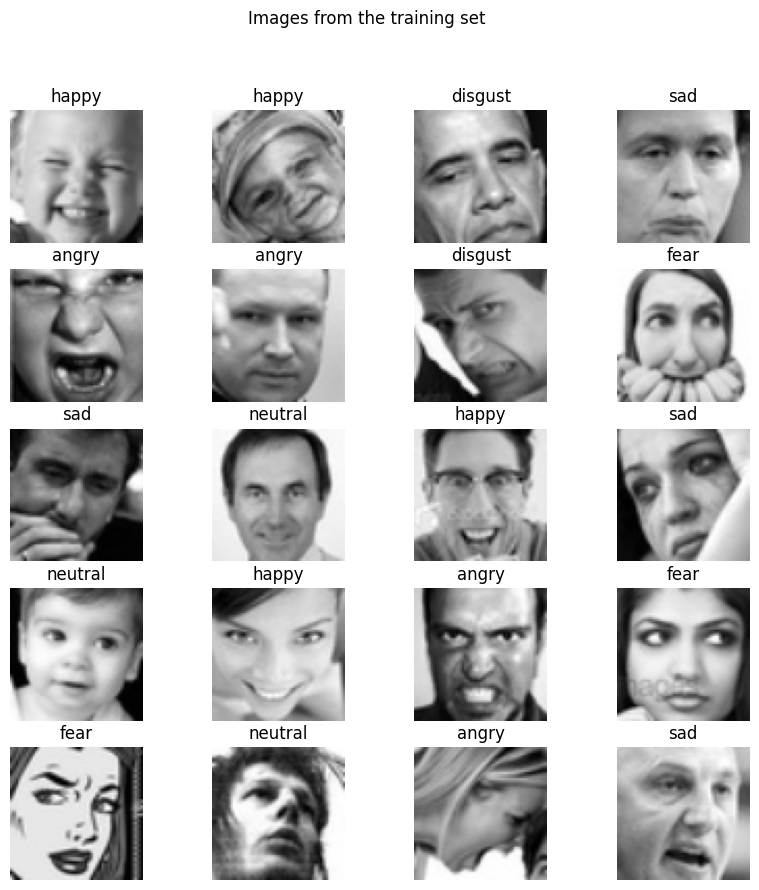

In [ ]:
plt.figure(figsize=(10,10))
for i in range(20):
    plt.subplot(5,4,i+1)
    a=np.random.randint(0,len(X_train))
    plt.imshow(X_train[a],cmap="gray")
    plt.title(y_train[a])
    plt.axis("off")
plt.suptitle("Images from the training set")
plt.show()

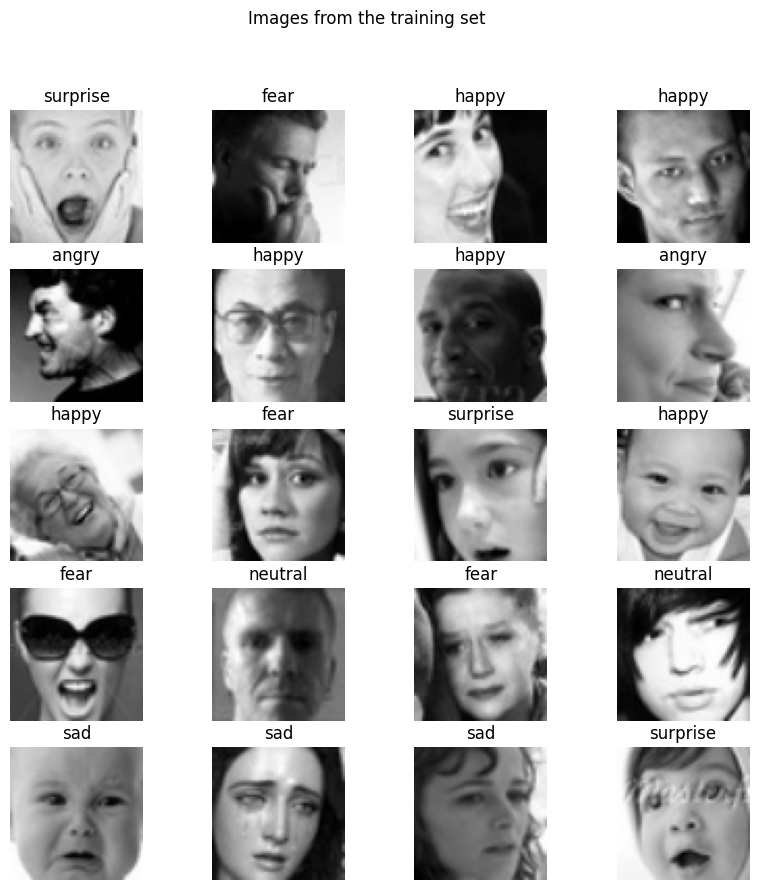

In [ ]:
plt.figure(figsize=(10,10))
for i in range(20):
    plt.subplot(5,4,i+1)
    a=np.random.randint(0,len(X_test))
    plt.imshow(X_test[a],cmap="gray")
    plt.title(y_test[a])
    plt.axis("off")
plt.suptitle("Images from the training set")
plt.show()

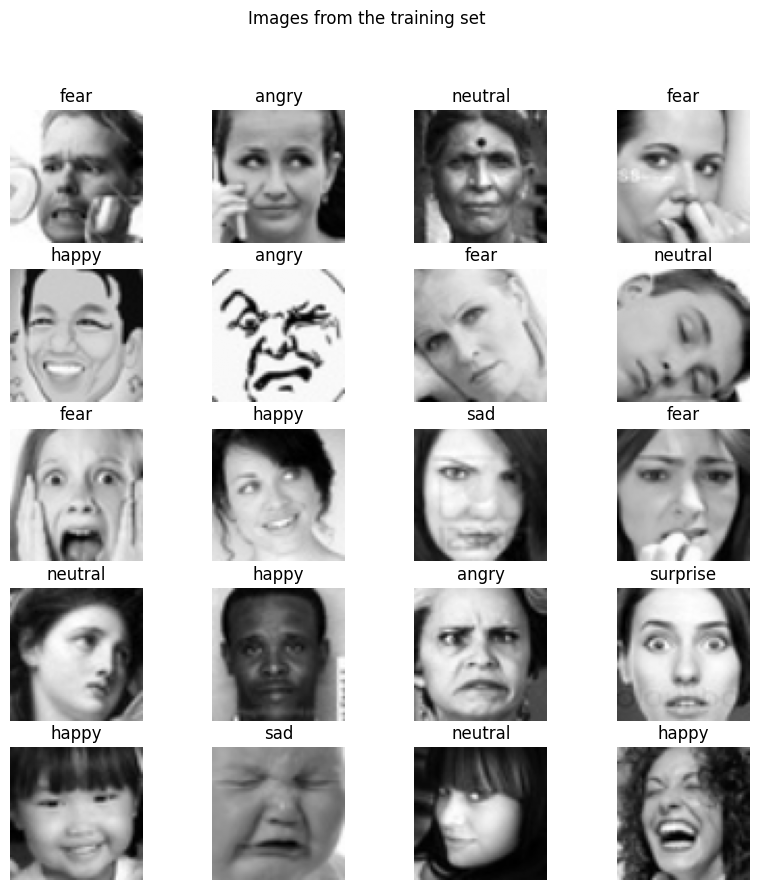

In [ ]:
plt.figure(figsize=(10,10))
for i in range(20):
    plt.subplot(5,4,i+1)
    a=np.random.randint(0,len(X_val))
    plt.imshow(X_val[a],cmap="gray")
    plt.title(y_val[a])
    plt.axis("off")
plt.suptitle("Images from the training set")
plt.show()

In [ ]:
le = LabelEncoder()
y_train = le.fit_transform(y_train)
y_test = le.transform(y_test)
y_val = le.transform(y_val)

In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, models, regularizers
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import EarlyStopping

# Inception Block
def inception_block(x, filters, name=None):
    f = filters // 4

    # Branch 1: 1x1 conv + max pool
    b1 = layers.Conv2D(f, (1, 1), padding='same', activation='relu')(x)
    b1 = layers.MaxPooling2D((4, 4), strides=(1, 1), padding='same')(b1)

    # Branch 2: 1x1 conv -> 3x3 conv
    b2 = layers.Conv2D(f, (1, 1), padding='same', activation='relu')(x)
    b2 = layers.Conv2D(f, (3, 3), padding='same', activation='relu')(b2)

    # Branch 3: 1x1 conv -> 5x5 conv
    b3 = layers.Conv2D(f, (1, 1), padding='same', activation='relu')(x)
    b3 = layers.Conv2D(f, (5, 5), padding='same', activation='relu')(b3)

    # Branch 4: 3x3 maxpool -> 1x1 conv
    b4 = layers.MaxPooling2D((4, 4), strides=(1, 1), padding='same')(x)
    b4 = layers.Conv2D(f, (1, 1), padding='same', activation='relu')(b4)

    x = layers.Concatenate(axis=-1, name=name)([b1, b2, b3, b4])
    x = layers.BatchNormalization()(x)
    return layers.Activation('relu')(x)

In [ ]:
# Residual Block
def residual_block(x, filters):
    shortcut = x
    x = layers.Conv2D(filters, (3, 3), padding='same')(x)
    x = layers.BatchNormalization()(x)
    x = layers.Activation('relu')(x)

    x = layers.Conv2D(filters, (3, 3), padding='same')(x)
    x = layers.BatchNormalization()(x)

    x = layers.Add()([shortcut, x])
    return layers.Activation('relu')(x)

In [ ]:
# Full Model
def build_model(input_shape=(64, 64, 1), num_classes=7):
    inputs = tf.keras.Input(shape=input_shape)
    x = layers.Rescaling(1. / 255)(inputs)

    # Layer 1
    x = layers.Conv2D(64, (3, 3), padding='same', activation='relu')(x)
    x = layers.BatchNormalization()(x)

    # Inception + Residual Blocks
    x = inception_block(x, 64, name="incept1")
    x = layers.BatchNormalization()(x)
    x = residual_block(x, 64)
    x = layers.Dropout(0.25)(x)

    x = inception_block(x, 128, name="incept2")
    x = layers.BatchNormalization()(x)
    x = residual_block(x, 128)
    x = layers.Dropout(0.25)(x)

    x = inception_block(x, 256, name="incept3")
    x = layers.BatchNormalization()(x)

    # Global Avg Pool + Dense
    x = layers.GlobalAveragePooling2D()(x)
    x = layers.Flatten()(x)
    x = layers.Dense(256, activation='relu', kernel_regularizer=regularizers.l2(1e-4))(x)
    outputs = layers.Dense(num_classes, activation='softmax', kernel_regularizer=regularizers.l2(1e-4))(x)

    return models.Model(inputs, outputs)

In [ ]:
# Instantiate the model
model = build_model(input_shape=(64, 64, 1), num_classes=7)

In [ ]:
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['sparse_categorical_accuracy']
)

In [ ]:
# Data Augmentation
datagen = ImageDataGenerator(
    rotation_range=15,
    width_shift_range=0.1,
    height_shift_range=0.1,
    horizontal_flip=True
)

In [ ]:
(x_train, y_train), (x_val, y_val) = (X_train, y_train), (X_val, y_val)

In [ ]:
x_train = np.array(x_train)
x_train = x_train.reshape(x_train.shape[0], x_train.shape[1], x_train.shape[2], 1)
datagen.fit(x_train)

In [ ]:
# Early stopping callback
early_stop = EarlyStopping(patience=5, restore_best_weights=True)

In [ ]:
model.summary()

Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_1       │ (None, 64, 64, 1) │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ rescaling_1         │ (None, 64, 64, 1) │          0 │ input_layer_1[0]… │
│ (Rescaling)         │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_23 (Conv2D)  │ (None, 64, 64,    │        640 │ rescaling_1[0][0] │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 64, 64,    │        256 │ conv2d_23[0][0]   │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_24 (Conv2D)  │ (None, 64, 64,    │      1,040 │ batch_normalizat… │
│                     │ 16)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_25 (Conv2D)  │ (None, 64, 64,    │      1,040 │ batch_normalizat… │
│                     │ 16)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_27 (Conv2D)  │ (None, 64, 64,    │      1,040 │ batch_normalizat… │
│                     │ 16)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d_7     │ (None, 64, 64,    │          0 │ batch_normalizat… │
│ (MaxPooling2D)      │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d_6     │ (None, 64, 64,    │          0 │ conv2d_24[0][0]   │
│ (MaxPooling2D)      │ 16)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_26 (Conv2D)  │ (None, 64, 64,    │      2,320 │ conv2d_25[0][0]   │
│                     │ 16)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_28 (Conv2D)  │ (None, 64, 64,    │      6,416 │ conv2d_27[0][0]   │
│                     │ 16)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_29 (Conv2D)  │ (None, 64, 64,    │      1,040 │ max_pooling2d_7[… │
│                     │ 16)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ incept1             │ (None, 64, 64,    │          0 │ max_pooling2d_6[… │
│ (Concatenate)       │ 64)               │            │ conv2d_26[0][0],  │
│                     │                   │            │ conv2d_28[0][0],  │
│                     │                   │            │ conv2d_29[0][0]   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 64, 64,    │        256 │ incept1[0][0]     │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_7        │ (None, 64, 64,    │          0 │ batch_normalizat… │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 64, 64,    │        256 │ activation_7[0][… │
│ (BatchNormalizatio… │ 64)               │            │                 

 Total params: 2,008,055 (7.66 MB)

 Trainable params: 668,455 (2.55 MB)

 Non-trainable params: 2,688 (10.50 KB)

 Optimizer params: 1,336,912 (5.10 MB)

In [ ]:
# Train the model
history = model.fit(
            datagen.flow(x_train, y_train, batch_size=64),
            validation_data=(x_val, y_val),
            epochs=30,
            callbacks=[early_stop]
          )

Epoch 1/30


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


 52/785 ━━━━━━━━━━━━━━━━━━━━ 3:18 271ms/step - loss: 1.4558 - sparse_categorical_accuracy: 0.4488

In [ ]:
plt.figure(figsize=(16,10))
plt.subplot(2,1,1)
plt.plot(range(1, Epochs+1), history.history['accuracy'], label='Training Accuracy')
plt.plot(range(1, Epochs+1), history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend(["Training Accuracy","Validation Accuracy"])
plt.subplot(2,1,2)
plt.plot(range(1, Epochs+1), history.history['loss'], label='Training Loss')
plt.plot(range(1, Epochs+1), history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.legend(["Training Loss","Validation Loss"])
plt.show()

In [ ]:
X_train = np.array(X_train)
print(len(X_train), X_train.shape)

In [ ]:
pred = model.predict(X_test)

In [ ]:
pred = pred.argmax(axis=1)

In [ ]:
scores = model.evaluate(X_test, y_test)

In [ ]:
scores

In [ ]:
target_names = ['Angry', 'Disgust', 'Fear', 'Happy', 'Neutral', 'Sad', 'Surprise']
print(classification_report(y_test, pred, target_names=target_names))

In [ ]:
model.save('newCustom.h5')